In [17]:
# %matplotlib ipympl
import numpy as np
from pathlib import Path
import utils as utils
import harp
import pandas as pd
import matplotlib.pyplot as plt
import aeon.io.video as video

In [18]:
# root = Path('C:/Users/neurogears/source/repos/swc/hypnose/example_data/2025-01-21T14-24-20/2025-01-21T14-24-20')
# root = Path('C:/Users/neurogears/source/repos/swc/hypnose/example_data/2025-01-24T15-37-50')
# root = Path('C:/Users/neurogears/source/repos/swc/hypnose/example_data/2025-01-28T11-50-38')
root = Path('C:/Users/neurogears/source/repos/swc/hypnose/example_data/2025-01-28T15-54-39')

In [19]:
metadata_reader = utils.SessionData()
session_settings = utils.load_json(metadata_reader, root/"SessionSettings")

print(session_settings.iloc[0]['metadata'].sequences)

[DotMap(rewardCondition1=[[{'command': 'OdorA', 'rewarded': True}]], rewardCondition2=[[{'command': 'OdorE', 'rewarded': True}]], enableTrialIndicator=True, presentationTime=0.8, interCommand='Purge', interCommandTime=0.2, repeatCount=20, maximumTime=1.0, responseTime=10.0, resetOnReward=True, interTrialInterval=0.0, name='OdourDiscrimination', defaultCommand='Default', enableRewardLocationIndicator=True)]


                            hw_counter   hw_timestamp  _frame  \
Time                                                            
1904-01-01 00:18:03.459488        1514  1102666724896       0   
1904-01-01 00:18:07.769600        1515  1102686725160       1   
1904-01-01 00:18:07.789568        1516  1102706725424       2   
1904-01-01 00:18:07.809568        1517  1102726724104       3   
1904-01-01 00:18:07.829568        1518  1102746724312       4   
...                                ...            ...     ...   
1904-01-01 00:19:40.210080        6137  1195125935424    4623   
1904-01-01 00:19:40.230080        6138  1195145934904    4624   
1904-01-01 00:19:40.250080        6139  1195165934144    4625   
1904-01-01 00:19:40.270080        6140  1195185934384    4626   
1904-01-01 00:19:40.290080        6141  1195205934424    4627   

                                                                        _path  \
Time                                                                     

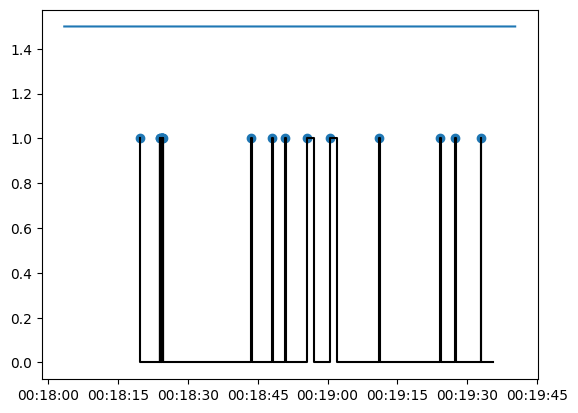

In [20]:
behavior_reader = harp.create_reader('device_schemas/behavior.yml', epoch=harp.REFERENCE_EPOCH)
olfactometer_reader = harp.create_reader('device_schemas/olfactometer.yml', epoch=harp.REFERENCE_EPOCH)
video_reader = utils.Video()
video_data = utils.load_video(video_reader, root/"VideoData")
print(video_data)

digital_input_data = utils.load(behavior_reader.DigitalInputState, root/"Behavior")
output_set = utils.load(behavior_reader.OutputSet, root/"Behavior")
olfactometer_valves_0 = utils.load(olfactometer_reader.OdorValveState, root/"Olfactometer0")
olfactometer_valves_1 = utils.load(olfactometer_reader.OdorValveState, root/"Olfactometer1")
olfactometer_end_0 = utils.load(olfactometer_reader.EndValveState, root/"Olfactometer0")
print(digital_input_data)

# find initiation onsets
initiating_events = digital_input_data['DIPort0'][digital_input_data['DIPort0'] == True]

plt.figure()
plt.step(digital_input_data.index, digital_input_data['DIPort0'] * 1, where='post', c='k')
plt.scatter(initiating_events.index, initiating_events)
plt.plot(video_data.index, np.ones((len(video_data.index), 1)) + 0.5)

print(np.ones((1, 200)).shape)

1904-01-01 00:19:32.856224


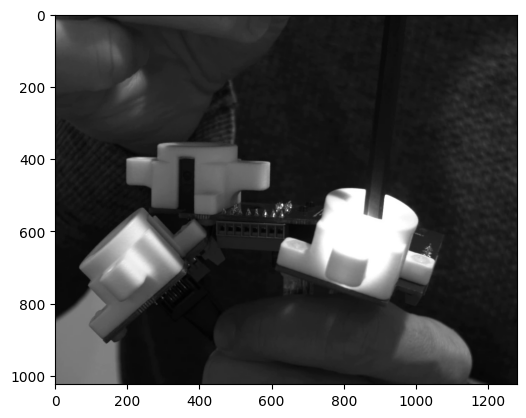

In [47]:
# get video frames around intiating event
window = 0.2 # time window in seconds
init_time = initiating_events.index[17]
print(init_time)
time_window = (init_time - pd.Timedelta(seconds=window), init_time + pd.Timedelta(seconds=window))

event_window = video_data[time_window[0] : time_window[1]]
event_frames = [f for f in video.frames(event_window)]

first_frame_index = np.where(event_window.index >= init_time)[0][0] - 1
first_frame = event_window.iloc[first_frame_index]

plt.imshow(event_frames[first_frame_index])

In [ ]:
# plot olfactometer state
# plt.figure()
# plt.xticks(rotation=90)
# plt.step(olfactometer_valves_0.index, olfactometer_valves_0['Valve0'] * 1, where='post')
# plt.step(olfactometer_valves_1.index, olfactometer_valves_1['Valve0'] * 1 - 1.2, where='post')
# plt.step(olfactometer_end_0.index, olfactometer_end_0['EndValve0'] * 1 - 2.6, where='post')
# plt.step(olfactometer_end_0.index, olfactometer_end_0['EndValve1'] * 1 - 3.8, where='post')
# plt.step(olfactometer_valves_1.index, olfactometer_valves_1['Valve3'] * 1 - 5.0, where='post')

# # plot initation nose poke, reward pokes
# plt.step(digital_input_data.index, digital_input_data['DIPort0'] * 0.5 + 3.6, where='post', c='k')
# plt.step(digital_input_data.index, digital_input_data['DIPort1'] * 0.5 + 3.0, where='post', c='b')
# plt.step(digital_input_data.index, digital_input_data['DIPort2'] * 0.5 + 1.8, where='post', c='r')

# # plot reward initiations
# print(output_set)
# plt.step(output_set.index, output_set["SupplyPort1"] * 0.5 + 2.4, where='post', c='m')
# plt.step(output_set.index, output_set["SupplyPort2"] * 0.5 + 1.2, where='post', c='m')